# Most in demanded skills for the top 3 most popular data roles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()



In [2]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill : ast.literal_eval(skill) if pd.notna(skill) else skill)

In [5]:
df_india=df[df['job_country']=='India'].copy()
df_india_skills=df_india.explode('job_skills')
df_india_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}"
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [11]:
df_skill_count=df_india_skills.groupby(['job_title_short','job_skills']).size()
df_skill_count=df_skill_count.reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
637,Data Engineer,sql,12993
603,Data Engineer,python,11568
807,Data Scientist,python,9248
632,Data Engineer,spark,7157
480,Data Engineer,aws,6993
...,...,...,...
1472,Senior Data Scientist,svn,1
998,Machine Learning Engineer,svn,1
138,Business Analyst,twilio,1
835,Data Scientist,solidity,1


In [19]:
top_roles=df_india['job_title_short'].value_counts().head(3).index.tolist()
top_roles

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [16]:
job_total_counts=df_india['job_title_short'].value_counts().reset_index(name='job_total')
job_total_counts

,job_title_short,job_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [24]:
df_skill_perc=pd.merge(df_skill_count,job_total_counts,on='job_title_short',how='left')
df_skill_perc['percentage']=100*df_skill_perc['skill_count']/df_skill_perc['job_total']
df_skill_perc

,job_title_short,job_skills,skill_count,job_total,percentage
0,Data Engineer,sql,12993,19062,68.161788
1,Data Engineer,python,11568,19062,60.686182
2,Data Scientist,python,9248,13279,69.643798
3,Data Engineer,spark,7157,19062,37.545903
4,Data Engineer,aws,6993,19062,36.685552
...,...,...,...,...,...
1684,Senior Data Scientist,svn,1,2486,0.040225
1685,Machine Learning Engineer,svn,1,671,0.149031
1686,Business Analyst,twilio,1,1887,0.052994
1687,Data Scientist,solidity,1,13279,0.007531


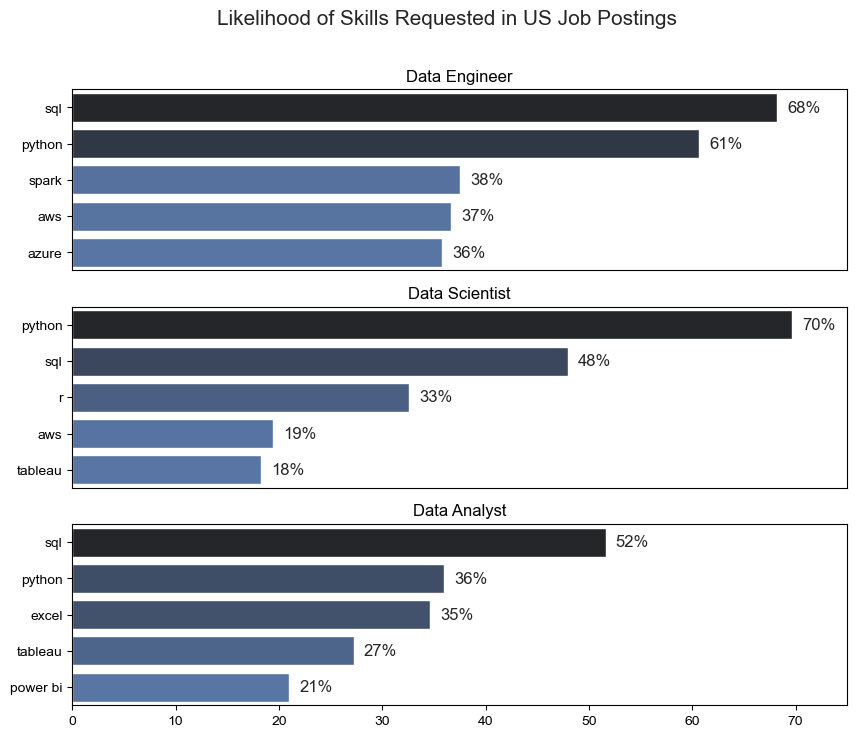

In [34]:
fig, ax=plt.subplots(len(top_roles),1,figsize=(10,8))
sns.set_theme(style='ticks')
for i,title in enumerate(top_roles):
    df_plot=df_skill_perc[df_skill_perc['job_title_short']==title].head(5)
    sns.barplot(data=df_plot,x='percentage',y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)

    if i != len(top_roles)-1:
        ax[i].set_xticks([])

    for n,v in enumerate(df_plot['percentage']):
        ax[i].text(v+1,n, f'{v:.0f}%', va='center')
fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
plt.show()

